# Data Wrangling and Preprocessing
First we need to set up our Python environment for preprocessing the data and do some housekeeping

## Preparing environment and importing raw data

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv("../data/Rocket-Eyewear-Company-International-Ads-Jun-1-2024-Jul-11-2024.csv")
raw_df.head()

,Reporting starts,Reporting ends,Ad name,Ad delivery,Ad Set Name,Bid,Bid type,Ad set budget,Ad set budget type,Last significant edit,...,Results,Result indicator,Reach,Impressions,Cost per results,Quality ranking,Engagement rate ranking,Conversion rate ranking,Amount spent (USD),Ends
0,2024-06-01,2024-07-11,DPA RTG - E,active,P30D - VC or ATC,0,ABSOLUTE_OCPM,5,Daily,2023-09-25T05:46:22-0400,...,NaN,NaN,469,2518,NaN,-,-,-,29.33,Ongoing
1,2024-06-01,2024-07-11,DPA RTG - C,active,P30D - VC or ATC,0,ABSOLUTE_OCPM,5,Daily,2023-09-25T05:46:22-0400,...,2.0,actions:offsite_conversion.fb_pixel_purchase,704,4945,32.035000,Average,Average,Average,64.07,Ongoing
2,2024-06-01,2024-07-11,DPA RTG - B,active,P30D - VC or ATC,0,ABSOLUTE_OCPM,5,Daily,2023-09-25T05:46:22-0400,...,1.0,actions:offsite_conversion.fb_pixel_purchase,490,2446,24.320000,Below average - Bottom 35% of ads,Above average,Average,24.32,Ongoing
3,2024-06-01,2024-07-11,DPA RTG - D,active,P30D - VC or ATC,0,ABSOLUTE_OCPM,5,Daily,2023-09-25T05:46:22-0400,...,1.0,actions:offsite_conversion.fb_pixel_purchase,748,6071,74.620000,Average,Average,Average,74.62,Ongoing
4,2024-06-01,2024-07-11,GIF - USPs - 1A - Homepage,active,All Feeds - P(LC) - All WCAs,0,ABSOLUTE_OCPM,Using campaign budget,0,2024-07-10T14:32:56-0400,...,3.0,actions:offsite_conversion.fb_pixel_purchase,6478,20972,20.373333,-,-,-,61.12,Ongoing


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reporting starts         81 non-null     object 
 1   Reporting ends           81 non-null     object 
 2   Ad name                  81 non-null     object 
 3   Ad delivery              81 non-null     object 
 4   Ad Set Name              81 non-null     object 
 5   Bid                      81 non-null     int64  
 6   Bid type                 81 non-null     object 
 7   Ad set budget            81 non-null     object 
 8   Ad set budget type       81 non-null     object 
 9   Last significant edit    81 non-null     object 
 10  Attribution setting      81 non-null     object 
 11  Results                  34 non-null     float64
 12  Result indicator         34 non-null     object 
 13  Reach                    81 non-null     int64  
 14  Impressions              81 

In [4]:
# Count occurrences of each Ad name
ad_name_counts = raw_df['Ad name'].value_counts()
unique_ads = raw_df["Ad name"].unique()
print("Therea are", len(unique_ads), "unique ads in the dataset.\n")

# Filter for Ad names that occur more than once
repeated_ad_names = ad_name_counts[ad_name_counts > 1].index.tolist()

# Display the repeated Ad names
print("The following Ad names occur more than once in the dataset:")
repeated_ad_names


Therea are 37 unique ads in the dataset.

The following Ad names occur more than once in the dataset:


['Video - TikTok Unboxing - 1A - Homepage',
 'Video - Influencer Content - Jimbo - 1.2.1A - Homepage INTL',
 'Video - Influencer Content - Jimbo - 1.3.1A - Sunglasses INTL',
 'Video - Influencer Content - Jimbo - 5.1A - Homepage INTL',
 'Video - Influencer Content - Jimbo - 1.3.1A - Homepage INTL',
 'Video - Influencer Content - Jimbo - 1.2.2A - Homepage INTL',
 'Video - Influencer Content - Jimbo - 1.1.2A - Homepage INTL',
 'Video - Influencer Content - Jimbo - 5.2A - Homepage INTL',
 'GIF - Multiple Colorways - 1A - SPT CP',
 'Video - Influencer Content - Jimbo - 5.3A - Homepage INTL',
 'Video - Influencer Content - Jimbo - 1.1.1A - Homepage INTL',
 'Video - Influencer Content - Jimbo - 1.3.2A - Homepage INTL',
 'Video - Influencer Content - Jimbo - 1.2.1A - Sunglasses INTL',
 'Video - Influencer Content - Evelyn - 2.1A - Homepage INTL',
 'Video - Influencer Content - Evelyn - 2.2A - Homepage INTL',
 'Video - Influencer Content - Evelyn - 2.3A - Homepage INTL',
 'Video - Influencer C

### Investigating duplicate Ad names

In [5]:
# investigate a given repeated Ad name
ad_name = repeated_ad_names[0]
filtered_rows = raw_df[raw_df["Ad name"] == ad_name]
filtered_rows

,Reporting starts,Reporting ends,Ad name,Ad delivery,Ad Set Name,Bid,Bid type,Ad set budget,Ad set budget type,Last significant edit,...,Results,Result indicator,Reach,Impressions,Cost per results,Quality ranking,Engagement rate ranking,Conversion rate ranking,Amount spent (USD),Ends
7,2024-06-01,2024-07-11,Video - TikTok Unboxing - 1A - Homepage,not_delivering,"All Feeds - P(CC) - JP, AU, NZ, HK, TW, SK, TH...",0,ABSOLUTE_OCPM,Using campaign budget,0,2024-04-07T21:47:30-0400,...,2.0,actions:offsite_conversion.fb_pixel_purchase,110283,180383,577.295000,-,-,-,1154.59,Ongoing
8,2024-06-01,2024-07-11,Video - TikTok Unboxing - 1A - Homepage,not_delivering,"All Feeds - P(LC) - US - MW, 22+ - Engaged Sho...",0,ABSOLUTE_OCPM,Using campaign budget,0,2024-03-29T19:26:29-0400,...,12.0,actions:offsite_conversion.fb_pixel_purchase,19355,26439,97.429167,-,-,-,1169.15,Ongoing
9,2024-06-01,2024-07-11,Video - TikTok Unboxing - 1A - Homepage,active,"All Feeds - P(LC) - US - MW, 25-60",0,ABSOLUTE_OCPM,Using campaign budget,0,2024-03-29T19:26:29-0400,...,13.0,actions:offsite_conversion.fb_pixel_purchase,38543,48429,132.046154,-,-,-,1716.60,Ongoing
10,2024-06-01,2024-07-11,Video - TikTok Unboxing - 1A - Homepage,active,All Feeds - P(LC) - All WCAs,0,ABSOLUTE_OCPM,Using campaign budget,0,2024-07-10T14:32:56-0400,...,3.0,actions:offsite_conversion.fb_pixel_purchase,7370,23374,42.506667,-,-,-,127.52,Ongoing
28,2024-06-01,2024-07-11,Video - TikTok Unboxing - 1A - Homepage,inactive,"ASC+ Ad Set - JP, AU, NZ, HK, TW, SK, MY - MW,...",0,ABSOLUTE_OCPM,Using campaign budget,0,2024-07-10T14:32:55-0400,...,1.0,actions:offsite_conversion.fb_pixel_purchase,6657,7508,85.050000,-,-,-,85.05,Ongoing
29,2024-06-01,2024-07-11,Video - TikTok Unboxing - 1A - Homepage,inactive,[US] BD - ASC+ - Prospecting - US - W - Low No...,0,ABSOLUTE_OCPM,Using campaign budget,0,2024-07-11T10:46:27-0400,...,1.0,actions:offsite_conversion.fb_pixel_purchase,4339,4922,201.220000,-,-,-,201.22,Ongoing


In [6]:
filtered_rows.describe()

,Bid,Results,Reach,Impressions,Cost per results,Amount spent (USD)
count,6.0,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.0,5.333333,31091.166667,48509.166667,189.257831,742.355000
std,0.0,5.609516,40841.191375,66468.819714,197.391385,693.418202
min,0.0,1.000000,4339.000000,4922.000000,42.506667,85.050000
25%,0.0,1.250000,6835.250000,11474.500000,88.144792,145.945000
50%,0.0,2.500000,13362.500000,24906.500000,114.737660,677.905000
75%,0.0,9.750000,33746.000000,42931.500000,183.926538,1165.510000
max,0.0,13.000000,110283.000000,180383.000000,577.295000,1716.600000


In [7]:
filtered_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 7 to 29
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reporting starts         6 non-null      object 
 1   Reporting ends           6 non-null      object 
 2   Ad name                  6 non-null      object 
 3   Ad delivery              6 non-null      object 
 4   Ad Set Name              6 non-null      object 
 5   Bid                      6 non-null      int64  
 6   Bid type                 6 non-null      object 
 7   Ad set budget            6 non-null      object 
 8   Ad set budget type       6 non-null      object 
 9   Last significant edit    6 non-null      object 
 10  Attribution setting      6 non-null      object 
 11  Results                  6 non-null      float64
 12  Result indicator         6 non-null      object 
 13  Reach                    6 non-null      int64  
 14  Impressions              6 non-nul

It looks like the main reason for the duplicate ad names is different target age groups, based on the respective Ad set names. I don't see this as an issue for this particular project, so I will aggregate rows by Ad name, since the distinction in instances here is not significant.  

In [8]:
# Group rows by Ad name and sum the values
summed_df = raw_df.groupby('Ad name').sum().reset_index()

summed_df.head()

,Ad name,Reporting starts,Reporting ends,Ad delivery,Ad Set Name,Bid,Bid type,Ad set budget,Ad set budget type,Last significant edit,...,Results,Result indicator,Reach,Impressions,Cost per results,Quality ranking,Engagement rate ranking,Conversion rate ranking,Amount spent (USD),Ends
0,DPA RTG - A,2024-06-01,2024-07-11,active,P30D - VC or ATC,0,ABSOLUTE_OCPM,5,Daily,2023-09-25T05:46:22-0400,...,0.0,0,334,1320,0.000,-,-,-,12.88,Ongoing
1,DPA RTG - B,2024-06-01,2024-07-11,active,P30D - VC or ATC,0,ABSOLUTE_OCPM,5,Daily,2023-09-25T05:46:22-0400,...,1.0,actions:offsite_conversion.fb_pixel_purchase,490,2446,24.320,Below average - Bottom 35% of ads,Above average,Average,24.32,Ongoing
2,DPA RTG - C,2024-06-01,2024-07-11,active,P30D - VC or ATC,0,ABSOLUTE_OCPM,5,Daily,2023-09-25T05:46:22-0400,...,2.0,actions:offsite_conversion.fb_pixel_purchase,704,4945,32.035,Average,Average,Average,64.07,Ongoing
3,DPA RTG - D,2024-06-01,2024-07-11,active,P30D - VC or ATC,0,ABSOLUTE_OCPM,5,Daily,2023-09-25T05:46:22-0400,...,1.0,actions:offsite_conversion.fb_pixel_purchase,748,6071,74.620,Average,Average,Average,74.62,Ongoing
4,DPA RTG - E,2024-06-01,2024-07-11,active,P30D - VC or ATC,0,ABSOLUTE_OCPM,5,Daily,2023-09-25T05:46:22-0400,...,0.0,0,469,2518,0.000,-,-,-,29.33,Ongoing


In [9]:
num_features = summed_df.describe().columns
summed_df.describe()

,Bid,Results,Reach,Impressions,Cost per results,Amount spent (USD)
count,37.0,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.0,2.405405,11587.216216,21413.378378,92.947919,265.099189
std,0.0,5.402980,30777.056599,49365.374800,213.652555,737.481062
min,0.0,0.000000,334.000000,871.000000,0.000000,11.700000
25%,0.0,0.000000,1193.000000,2518.000000,0.000000,27.420000
50%,0.0,1.000000,3470.000000,5370.000000,13.700000,74.620000
75%,0.0,2.000000,10687.000000,20556.000000,73.214000,181.680000
max,0.0,32.000000,186547.000000,291055.000000,1135.546987,4454.130000


In [10]:
summed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ad name                  37 non-null     object 
 1   Reporting starts         37 non-null     object 
 2   Reporting ends           37 non-null     object 
 3   Ad delivery              37 non-null     object 
 4   Ad Set Name              37 non-null     object 
 5   Bid                      37 non-null     int64  
 6   Bid type                 37 non-null     object 
 7   Ad set budget            37 non-null     object 
 8   Ad set budget type       37 non-null     object 
 9   Last significant edit    37 non-null     object 
 10  Attribution setting      37 non-null     object 
 11  Results                  37 non-null     float64
 12  Result indicator         37 non-null     object 
 13  Reach                    37 non-null     int64  
 14  Impressions              37 

/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/codespace/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:115: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])
posx and posy should be finite values
posx and posy should be finite values


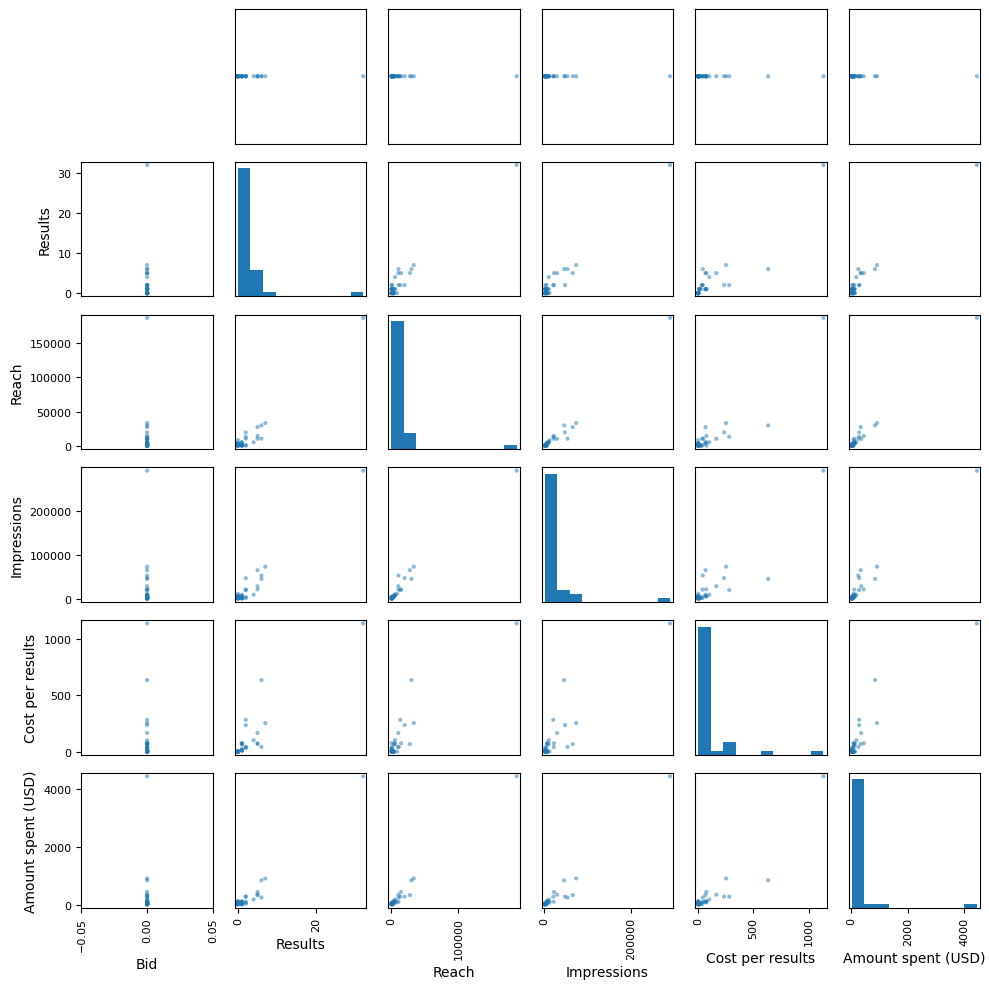

In [11]:
scatter_matrix = pd.plotting.scatter_matrix(summed_df[num_features], figsize=(10, 10))

# Customize the plot
plt.tight_layout()
plt.show()

### Ad hoc data engineering

Creating labels to indicate if a creative was produced by Shown Media (1) or not (0). 

In [12]:
# Define the regex pattern
pattern = r"Video - Influencer Content - (Evelyn|Jimbo) - \d\.\d\w - (Homepage|Sunglasses) INTL"

# Create the new column based on the pattern match
summed_df['Shown asset'] = summed_df['Ad name'].str.contains(pattern).astype(int)
summed_df['Shown asset'].value_counts()

/tmp/ipykernel_65937/1160496091.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  summed_df['Shown asset'] = summed_df['Ad name'].str.contains(pattern).astype(int)


Shown asset
0    25
1    12
Name: count, dtype: int64

Create a coefficient between results and ad spend "Conversion ratio".

In [13]:
summed_df['Conversion ratio'] = summed_df['Results'] / summed_df['Amount spent (USD)']

max_conversion_ratio = summed_df['Conversion ratio'].max()
min_conversion_ratio = summed_df['Conversion ratio'].min()

print("Conversion ratio ranges from", min_conversion_ratio, "to", max_conversion_ratio)

Conversion ratio ranges from 0.0 to 0.07052186177715092


## Visualizing aggregate performance data


### Sales performance

In [21]:
Shown_assets_df = summed_df[summed_df['Shown asset'] == 1]
Shown_spend_sum = round(Shown_assets_df['Amount spent (USD)'].sum(), 3)
Shown_results_sum = round(Shown_assets_df['Results'].sum(), 3)
shown_results_cost_mean = round(Shown_assets_df['Cost per results'].mean(), 3)
Shown_conversion_mean = round(Shown_assets_df['Conversion ratio'].mean(), 3)

non_shown_assets_df = summed_df[summed_df['Shown asset'] == 0]
non_shown_spend_sum = round(non_shown_assets_df['Amount spent (USD)'].sum(), 3)
non_shown_results_sum = round(non_shown_assets_df['Results'].sum(), 3)
non_shown_results_cost_mean = round(non_shown_assets_df['Cost per results'].mean(), 3)
non_shown_conversion_mean = round(non_shown_assets_df['Conversion ratio'].mean(), 3)


print("Shown's average conversion ratio is", Shown_conversion_mean)
print("Shown's total spend is", Shown_spend_sum)
print("Shown's total results is", Shown_results_sum)
print("Shown's average cost per result is", shown_results_cost_mean)
print("\n")
print("Non Shown's average conversion ratio is", non_shown_conversion_mean)
print("Non Shown's total spend is", non_shown_spend_sum)
print("Non Shown's total results is", non_shown_results_sum)
print("Non Shown's average cost per result is", non_shown_results_cost_mean)

class_distribution = summed_df['Shown asset'].value_counts()
class_distribution

Shown's average conversion ratio is 0.02
Shown's total spend is 1614.89
Shown's total results is 17.0
Shown's average cost per result is 90.654


Non Shown's average conversion ratio is 0.011
Non Shown's total spend is 8193.78
Non Shown's total results is 72.0
Non Shown's average cost per result is 94.049


Shown asset
0    25
1    12
Name: count, dtype: int64

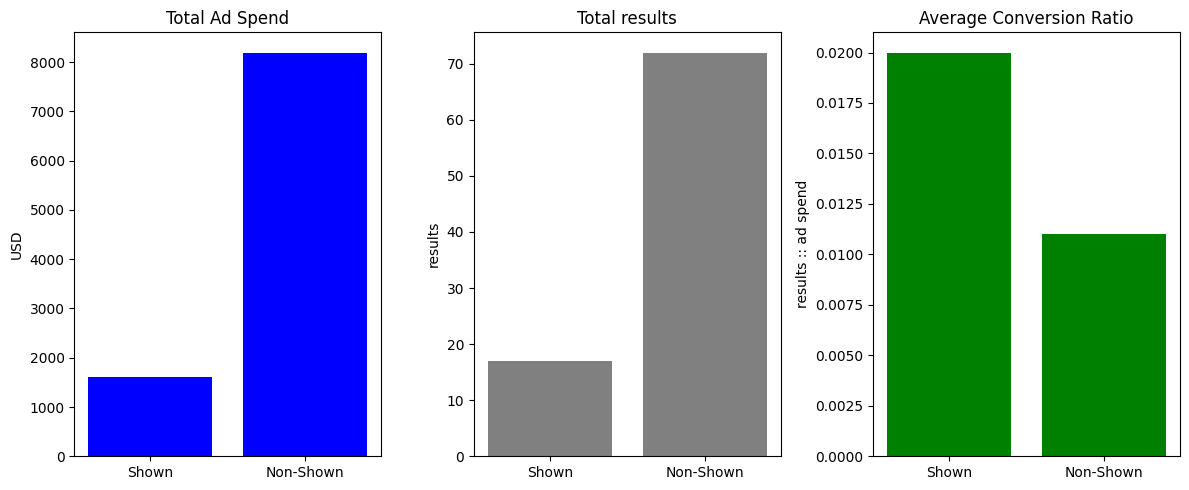

In [25]:
ad_spend_data = [Shown_spend_sum, non_shown_spend_sum]
results_data = [Shown_results_sum, non_shown_results_sum]
conversion_ratio_data = [Shown_conversion_mean, non_shown_conversion_mean]

# labels = ['Shown', 'Non-Shown']

categories = ['Shown', 'Non-Shown']



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# First bar chart
ax1.bar(categories, ad_spend_data, color='blue')
ax1.set_title('Total Ad Spend')
ax1.set_xlabel('')
ax1.set_ylabel('USD')

# Third bar chart
ax2.bar(categories, results_data, color='grey')
ax2.set_title('Total results')
ax2.set_xlabel('')
ax2.set_ylabel('results')

# Second bar chart
ax3.bar(categories, conversion_ratio_data, color='green')
ax3.set_title('Average Conversion Ratio')
ax3.set_xlabel('')
ax3.set_ylabel('results :: ad spend')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

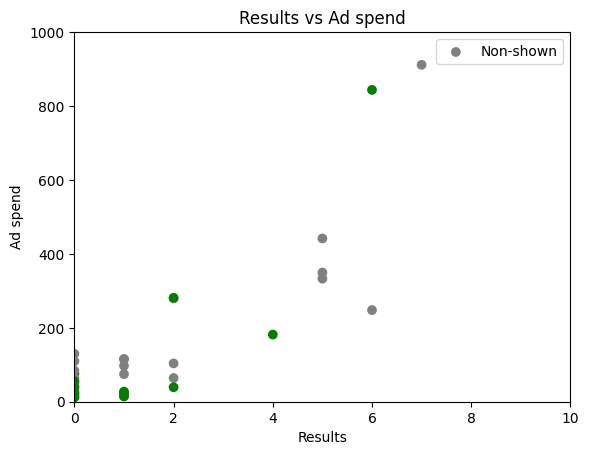

In [32]:
# Define colors based on 'Shown asset'
colors = ['green' if asset == 1 else 'grey' for asset in summed_df['Shown asset']]

# Create the scatter plot
plt.scatter(summed_df['Results'], summed_df['Amount spent (USD)'], c=colors)
plt.xlabel('Results')
plt.ylabel('Ad spend')
plt.title('Results vs Ad spend')
plt.xlim(0, 10)
plt.ylim(0, 1000)

# Add legend
plt.legend(['Non-shown', 'Shown'])

plt.show()

In [52]:
shown_results_share = results_data[0]/sum(results_data)
shown_spend_share = ad_spend_data[0]/sum(ad_spend_data)
shown_results_share, shown_spend_share

(0.19101123595505617, 0.1646390387279825)

Shown ads represent 19% of total results on only 16% of total ad spend, boasting a 2% conversion ratio, approximately double that of Non-shown ads.   
In short, Shown ads typical yield more results on less ad spend. 

### Audience contact

In [34]:

Shown_reach_mean = round(Shown_assets_df['Reach'].mean(), 3)
Shown_reach_costs = Shown_assets_df['Reach'] / Shown_assets_df['Amount spent (USD)']
Shown_impressions_costs = Shown_assets_df['Impressions'] / Shown_assets_df['Amount spent (USD)']
Shown_impressions_mean = round(Shown_assets_df['Impressions'].mean(), 3)

non_shown_reach_mean = round(non_shown_assets_df['Reach'].mean(), 3)
non_shown_reach_costs = non_shown_assets_df['Reach'] / non_shown_assets_df['Amount spent (USD)']
non_shown_impressions_costs = non_shown_assets_df['Impressions'] / non_shown_assets_df['Amount spent (USD)']
non_shown_impressions_mean = round(non_shown_assets_df['Impressions'].mean(), 3)

print("Shown's average reach is", Shown_reach_mean)
print("Shown's average cost per reach is", round(Shown_reach_costs.mean(),3))
print("Shown's average cost per impression is", round(Shown_impressions_costs.mean(),3))
print("Shown's average impressions is", Shown_impressions_mean)
print("\n")
print("Non Shown's average reach is", non_shown_reach_mean)
print("Non shown's average cost per reach is", round(non_shown_reach_costs.mean(),3))
print("Non Shown's average cost per impression is", round(non_shown_impressions_costs.mean(),3))
print("Non Shown's average impressions is", non_shown_impressions_mean)


Shown's average reach is 5295.833
Shown's average cost per reach is 46.894
Shown's average cost per impression is 72.333
Shown's average impressions is 8206.417


Non Shown's average reach is 14607.08
Non shown's average cost per reach is 54.184
Non Shown's average cost per impression is 111.196
Non Shown's average impressions is 27752.72


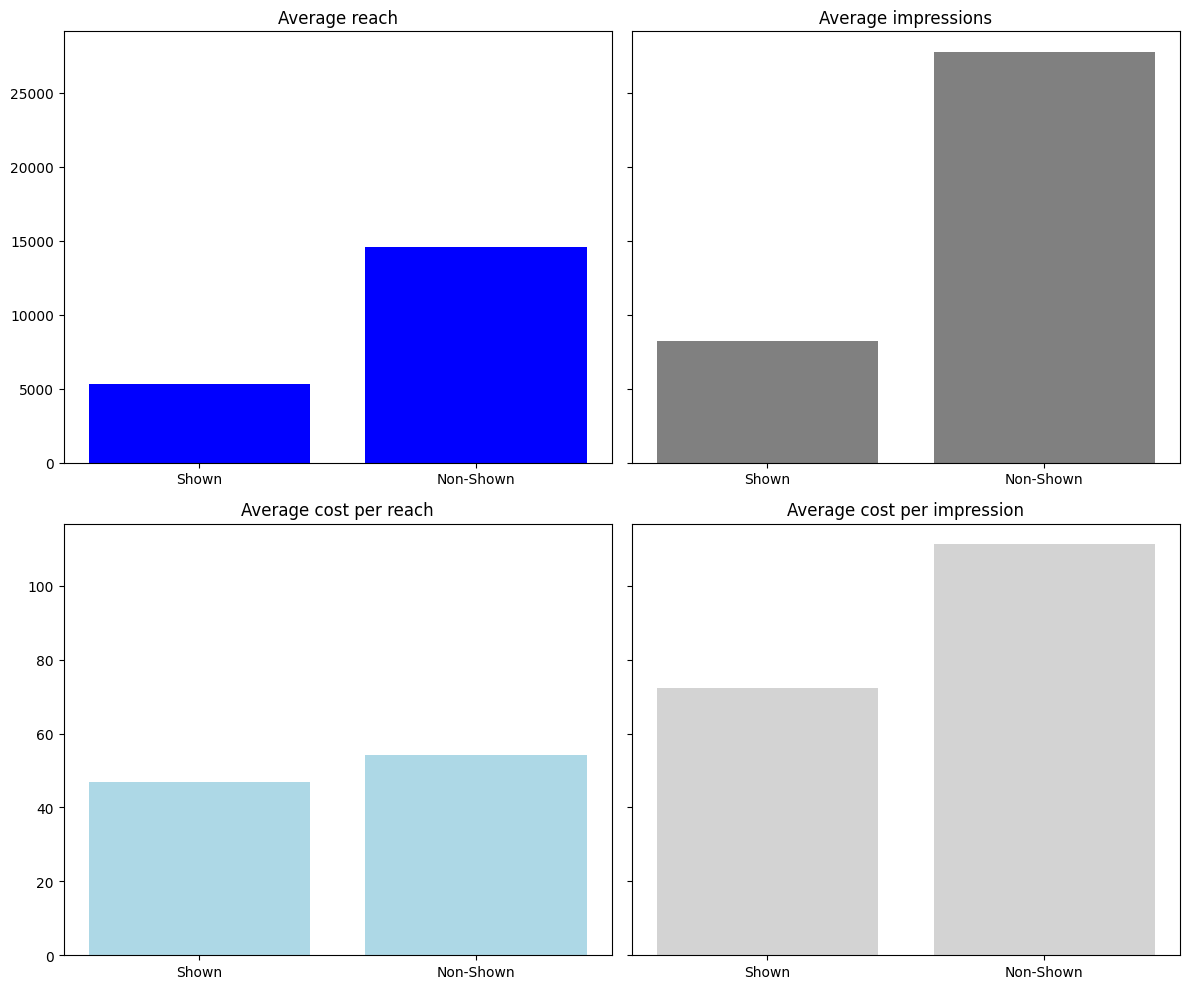

In [39]:
categories = ['Shown', 'Non-Shown']

reach_means = [Shown_reach_mean, non_shown_reach_mean]
impressions_means = [Shown_impressions_mean, non_shown_impressions_mean]


fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey='row')

# Flatten the array of axes for easier indexing
(ax1, ax2), (ax3, ax4) = axs

# First bar chart
ax1.bar(categories, reach_means, color='blue')
ax1.set_title('Average reach')
ax1.set_xlabel('')
ax1.set_ylabel('')

# second bar chart
ax2.bar(categories, impressions_means, color='grey')
ax2.set_title('Average impressions')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Third bar chart
ax3.bar(categories, [Shown_reach_costs.mean(), non_shown_reach_costs.mean()], color='lightblue')
ax3.set_title('Average cost per reach')
ax3.set_xlabel('')
ax3.set_ylabel('')

# Fourth bar chart
ax4.bar(categories, [Shown_impressions_costs.mean(), non_shown_impressions_costs.mean()], color='lightgrey')
ax4.set_title('Average cost per impression')
ax4.set_xlabel('')
ax4.set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

Shown under performs in terms of total audience contact, but beats non-shown ads by capturing reach and impressions for significantly cheaper. In other words Shown ads achieves audience contact more thriftily than non shown ads. 

# Conclusion



The analysis reveals several key insights about the performance of Shown ads versus Non-shown ads.

Conversion Efficiency:  
Shown ads account for 19% of total results while only consuming 16% of the total ad spend, yielding a conversion ratio of 2%, which is approximately double that of Non-shown ads.
This indicates that Shown ads typically generate more results with less ad spend.


Audience Contact and Cost Efficiency:  
While Shown ads underperform in terms of total audience contact, they excel in cost-efficiency. They capture reach and impressions at significantly lower costs compared to Non-shown ads, achieving audience contact more thriftily.  

Summary of Key Metrics:

Shown Ads:  
Average conversion ratio: 0.02  
Total spend: $1614.89  
Total results: 17.0  
Average cost per result: $90.65  
Average reach: 5295.83  
Average cost per reach: $46.89  
Average impressions: 8206.42  
Average cost per impression: $72.33  

Non-Shown Ads:  
Average conversion ratio: 0.011  
Total spend: $8193.78  
Total results: 72.0  
Average cost per result: $94.05  
Average reach: 14607.08  
Average cost per reach: $54.18  
Average impressions: 27752.72  
Average cost per impression: $111.20  

Data Set Overview:  
The dataset includes 25 Non-shown ads and 12 Shown ads.  
The analysis covers the period from June 1 to July 11.  